In [1]:
from __future__ import division #always returns approximations from divisions
import numpy as np
import matplotlib.pyplot as plt
import ephem #for astronomy calculations, converting coordinate systems
import pandas as pd
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
v_df = pd.read_csv('voy1_day.txt', skiprows = 55, skipfooter=19587-19532, engine='python') #daily ephemeris of voyager 1 from 1977-09-06 to 2030-12-31

print(v_df)

                     date na1 na2         ra       dec  Unnamed: 5
0       1977-Sep-06 00:00           65.45370  25.53700         NaN
1       1977-Sep-07 00:00           66.57385  25.74445         NaN
2       1977-Sep-08 00:00           66.76953  25.78005         NaN
3       1977-Sep-09 00:00           66.84421  25.79444         NaN
4       1977-Sep-10 00:00           66.87684  25.80155         NaN
...                   ...  ..  ..        ...       ...         ...
19470   2030-Dec-27 00:00          259.35425  12.06053         NaN
19471   2030-Dec-28 00:00          259.35969  12.06104         NaN
19472   2030-Dec-29 00:00          259.36510  12.06161         NaN
19473   2030-Dec-30 00:00          259.37048  12.06223         NaN
19474   2030-Dec-31 00:00          259.37583  12.06290         NaN

[19475 rows x 6 columns]


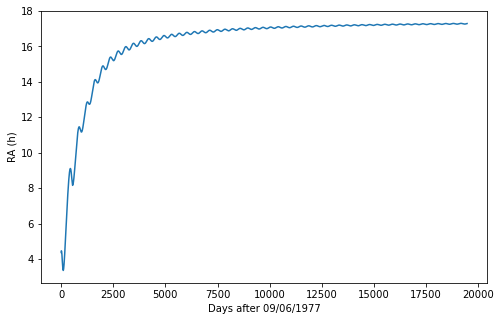

In [6]:
time = np.arange(0, 19475)

plt.figure(figsize=(8, 5))

#plt.title("Voyager 1's RA Over Time")
plt.xlabel("Days after 09/06/1977")
plt.ylabel("RA (h)")
plt.plot(time, v_df['ra']/15)
img1 = plt.savefig('voy1_day_ra.png')

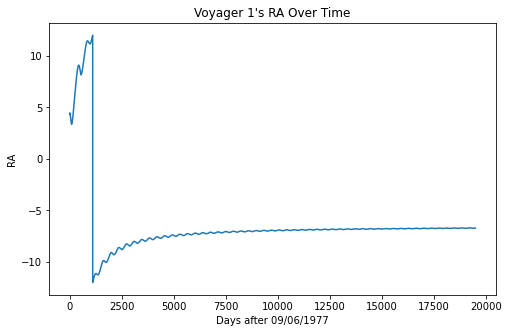

In [25]:
v_df.loc[v_df['ra'] > 180, 'ra'] -= 360
v_df['ra'] = v_df['ra'] / 15

time = np.arange(0, 19475)

plt.figure(figsize=(8, 5))

plt.title("Voyager 1's RA Over Time")
plt.xlabel("Days after 09/06/1977")
plt.ylabel("RA")
plt.plot(time, v_df['ra'])
img1 = plt.savefig('voy1_day_ra.png')

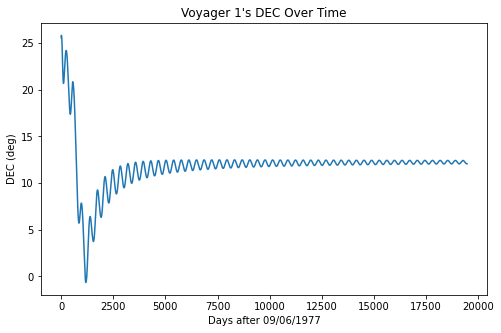

In [7]:
plt.figure(figsize=(8, 5))

plt.title("Voyager 1's DEC Over Time")
plt.xlabel("Days after 09/06/1977")
plt.ylabel("DEC (deg)")
plt.plot(time, v_df['dec'])
img1 = plt.savefig('voy1_day_dec.png')

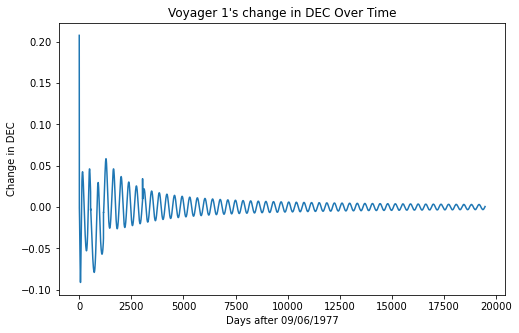

In [43]:
dec_d = np.diff(v_df['dec']) / 1
ra_d = np.diff(v_df['ra']) / 1

plt.figure(figsize=(8, 5))

plt.title("Voyager 1's change in DEC Over Time")
plt.xlabel("Days after 09/06/1977")
plt.ylabel("Change in DEC")

plt.plot(time[:-1], dec_d)
plt.savefig("voy1_day_cdec.png")

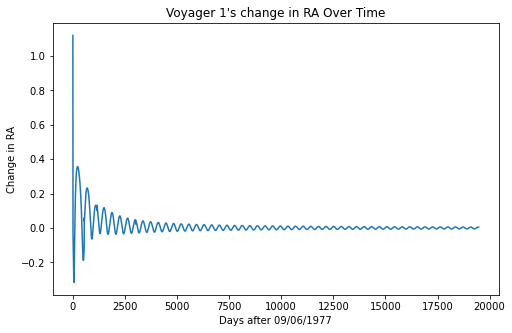

In [44]:
plt.figure(figsize=(8, 5))

plt.title("Voyager 1's change in RA Over Time")
plt.xlabel("Days after 09/06/1977")
plt.ylabel("Change in RA")

plt.plot(time[:-1], ra_d)
plt.savefig("voy1_day_cra.png")